<a href="https://colab.research.google.com/github/Suphattha/data_viz/blob/main/Visualization_Final_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

จากข้อมูลต่อสองตารางนี้ 
https://drive.google.com/file/d/1nu5kbf998xuMxll6eAJRVHEDbdo3v63D/view?usp=sharing  (ผู้ติดเชื้อ covid-19 กับ จำนวนผู้เดินทางใน)

ข้อสอบแบ่งเป็น 2 ส่วน 
1. Colab Notebook นี้ ให้สร้างกราฟเพื่อตามโจทย์ที่กำหนด
2. ใช้ Google Data Studio สร้าง Dashboard แสดงข้อมูลสำคัญ (ข้อมูลที่นักศึกษาเห็นว่าสำคัญและน่าสนใจที่จะนำมาแสดง) และอัดวิดีโออธิบาย Dashboard นั้น แล้วอัพโหลดวิดีโอลง youtube ในรูปแบบ unlist

*commit colab ข้อ 1 เป็น ชื่อ link youtube ที่อัพโหลดในข้อ 2 แล้วไปเพิ่มข้อมูลเวลา submit ใน google sheet นี้ https://docs.google.com/spreadsheets/d/1dxHoPftXEmK1ZRs2OAjAA7DbS-YdZBXzkXz_qiZteUg/edit?usp=sharing


**ส่วนที่ 1**

สร้างกราฟเพื่อแสดงข้อมูลต่อไปนี้ (ข้อละอย่างน้อย 1 กราฟ)
1. เปรียบเทียบจำนวนผู้ป่วยกับจำนวนคนเดินทางในแต่ละเดือน
2. เปรียบเทียบวิธีการเดินทางของคนเป็นรายเดือนเทียบกับจำนวนผู้ป่วยในเดือนนั้นๆ
3. เปรียบเทียบ จำนวนผู้ป่วยที่ตรวจพบเชื้อ covid-19 ของจังหวัด top 10 ของ 6 เดือนล่าสุด
4. เปรียบเทียบจำนวนผู้ป่วยที่ตรวจพบเชื้อ covid-19 ของแต่ละภูมิภาค (5 ภูมิภาค (การท่องเที่ยว)) ตามข้อมูลใน https://th.wikipedia.org/wiki/ภูมิภาคของประเทศไทย 
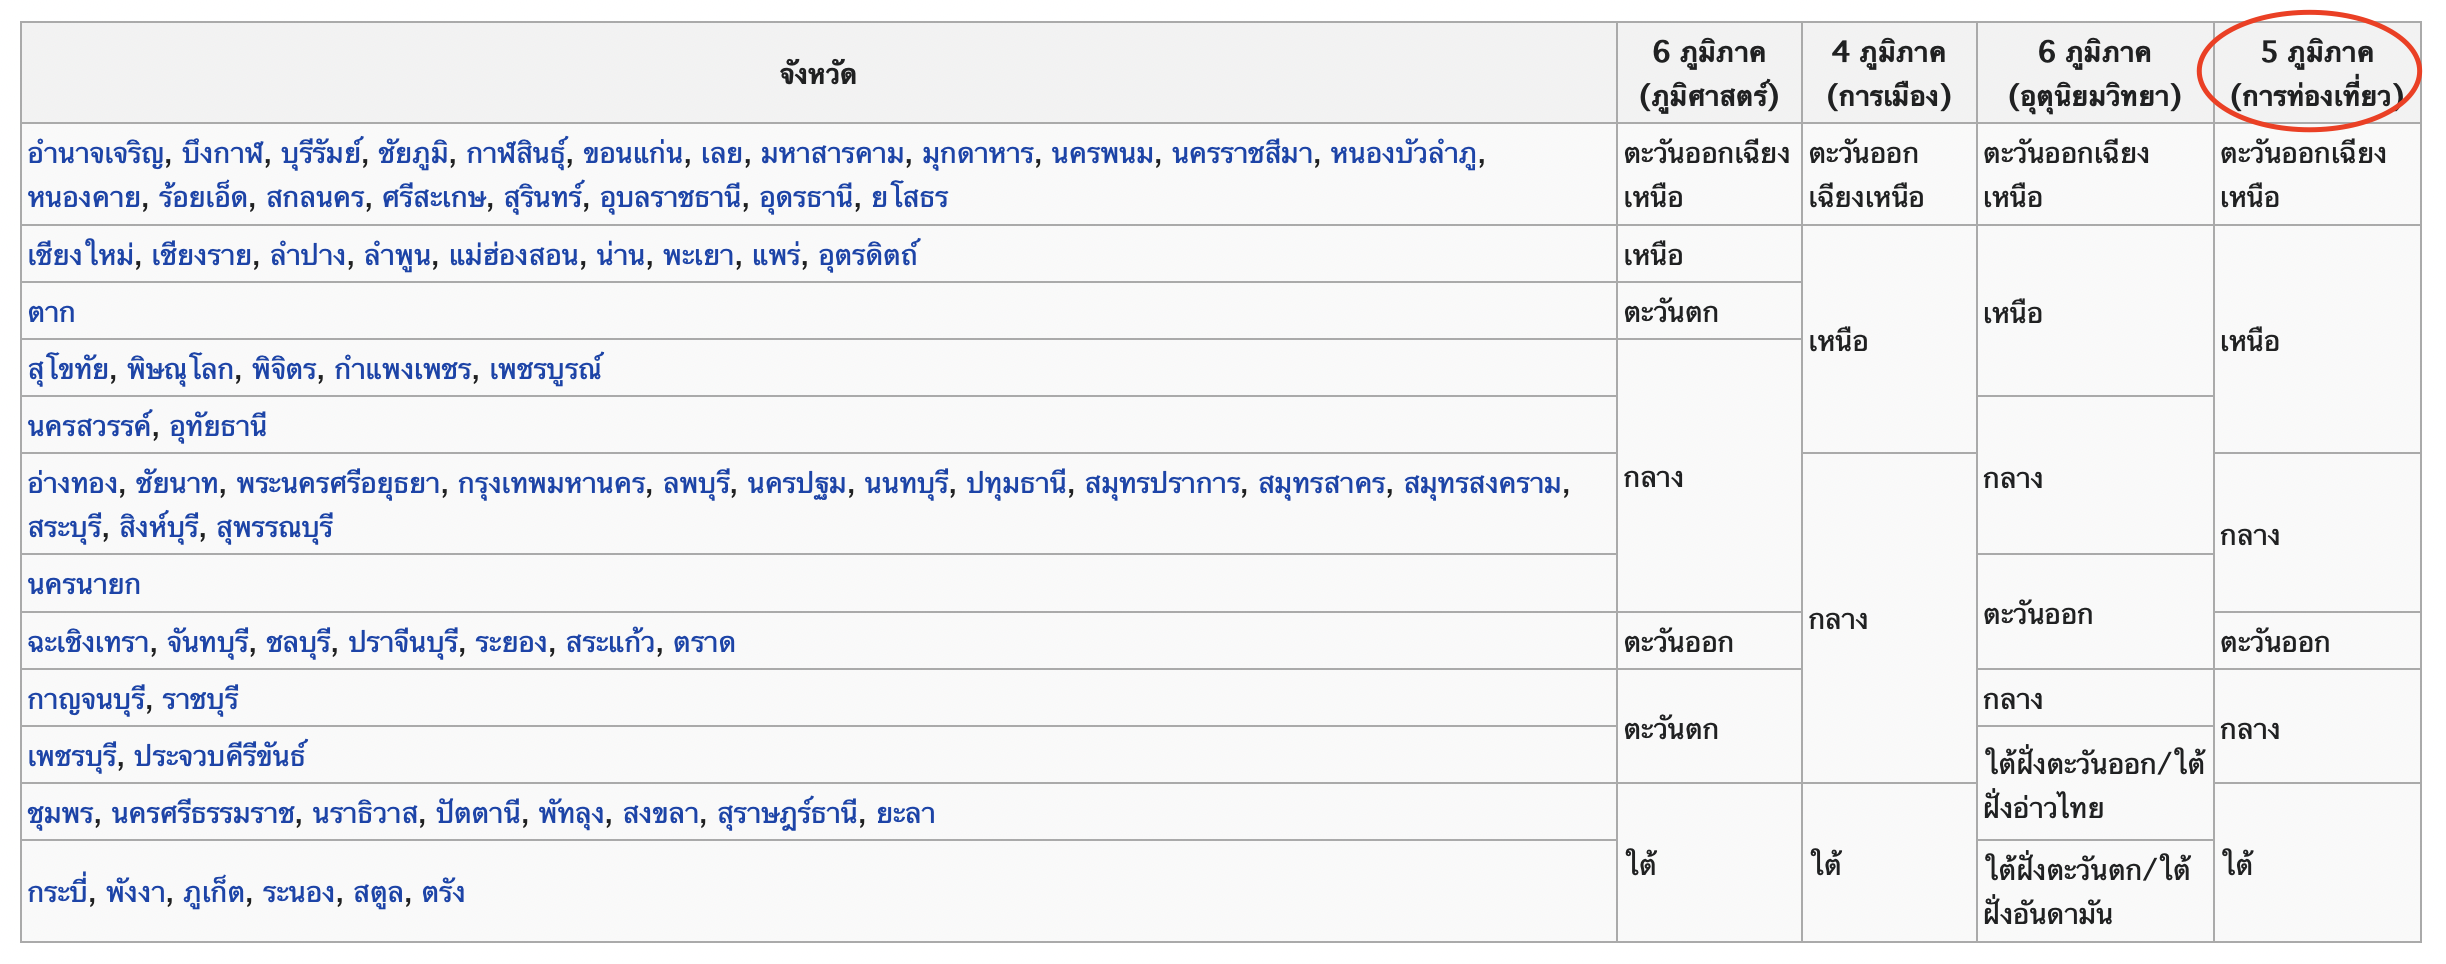



กำหนดส่ง ไม่เกิน 4 พฤษภาคม 2564 เวลา 23.59

First, we have to say which packages we are going to use by them.

In [6]:
import pandas
import pandas as pd

In [7]:
from datetime import datetime as dt
from datetime import time
import numpy as np
from matplotlib import pyplot as plt

Connect with Google drive

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Create path variables to store where is the data files

In [9]:
import os
path = '/content/drive/My Drive/dataviz_2021_Final'

load data to memory

In [10]:
file_path = os.path.join(path,'passenger-covid19.xlsx') 
print(file_path)

/content/drive/My Drive/dataviz_2021_Final/passenger-covid19.xlsx


In [11]:
covid_file_path = os.path.join(path,'covid19cases.csv') 
print(covid_file_path)

/content/drive/My Drive/dataviz_2021_Final/covid19cases.csv


Then use pandas to load the data into the environment

In [12]:
data1 = pd.read_excel('/content/drive/My Drive/dataviz_2021_Final/passenger-covid19.xlsx')
data1.head()

,ขนคน/ขนสินค้า,โหมดการเดินทาง,รูปแบบการเดินทาง,สาธารณะ/ส่วนบุคคล,หน่วยงาน,ยานพาหนะ/ท่า,ม.ค. 2562,ก.พ. 2562,มี.ค. 2562,เม.ย. 2562,พ.ค. 2562,มิ.ย. 2562,ก.ค. 2562,ส.ค. 2562,ก.ย. 2562,ต.ค. 2562,พ.ย. 2562,ธ.ค. 2562
0,ขนคน (คน),ทางบก,การเดินทางระหว่างจังหวัด,สาธารณะ,บขส.,รถ ขบส. และ รถร่วม,5236331,4628878.0,5234387.0,5137450.0,4885221.0,4572261.0,4772689.0,4701554.0,4482707.0,4774815.0,4559610.0,4840673.0
1,ขนคน (คน),ทางบก,การเดินทางระหว่างจังหวัด,สาธารณะ,ขบ.,รถ Taxi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ขนคน (คน),ทางบก,การเดินทางระหว่างจังหวัด,สาธารณะ,ขบ.,รถหมวด 3,2550864,2334128.0,2599144.0,2602024.0,2543424.0,2435944.0,2526104.0,2492728.0,2420736.0,2499408.0,2450888.0,2516032.0
3,ขนคน (คัน),ทางบก,การเดินทางระหว่างจังหวัด,ส่วนบุคคล,ทล.,รถยนต์ (10 จุดสำรวจ),28907234,26699682.0,30210655.0,28542444.0,29407838.0,27789633.0,28811411.0,29552867.0,27950945.0,29335664.0,28325020.0,29615013.0
4,ขนคน (คัน),ทางบก,การเดินทางระหว่างจังหวัด,ส่วนบุคคล,กทพ.,รถยนต์ (ทางด่วน),56404661,51536713.0,57376504.0,46838468.0,45769555.0,47344042.0,46027953.0,47566521.0,44765838.0,47236151.0,46996660.0,47294111.0


In [13]:
data2 = pd.read_csv('/content/drive/My Drive/dataviz_2021_Final/covid19cases.csv')
data2.head()

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN


ชี้ค่าในตาราง เพื่อเตรียมข้อมูลจำนวนผู้ติดเชื้อโควิด

In [14]:
data2['announce_date']

0        12/1/2020
1        17/1/2020
2        22/1/2020
3        22/1/2020
4        24/1/2020
           ...    
57505    26/4/2021
57506    26/4/2021
57507    26/4/2021
57508    26/4/2021
57509    26/4/2021
Name: announce_date, Length: 57510, dtype: object

In [15]:
data2['announce_date'] = pd.to_datetime(data2['announce_date'],format='%d/%m/%Y')

In [16]:
covid = [data2[(data2['announce_date'].dt.month==1) & (data2['announce_date'].dt.year==2020)].count()[0],
            data2[(data2['announce_date'].dt.month==2) & (data2['announce_date'].dt.year==2020)].count()[0],
            data2[(data2['announce_date'].dt.month==3) & (data2['announce_date'].dt.year==2020)].count()[0],
            data2[(data2['announce_date'].dt.month==4) & (data2['announce_date'].dt.year==2020)].count()[0],
            data2[(data2['announce_date'].dt.month==5) & (data2['announce_date'].dt.year==2020)].count()[0],
            data2[(data2['announce_date'].dt.month==6) & (data2['announce_date'].dt.year==2020)].count()[0],
            data2[(data2['announce_date'].dt.month==7) & (data2['announce_date'].dt.year==2020)].count()[0],
            data2[(data2['announce_date'].dt.month==8) & (data2['announce_date'].dt.year==2020)].count()[0],
            data2[(data2['announce_date'].dt.month==9) & (data2['announce_date'].dt.year==2020)].count()[0],
            data2[(data2['announce_date'].dt.month==10) & (data2['announce_date'].dt.year==2020)].count()[0],
            data2[(data2['announce_date'].dt.month==11) & (data2['announce_date'].dt.year==2020)].count()[0],
            data2[(data2['announce_date'].dt.month==12) & (data2['announce_date'].dt.year==2020)].count()[0],
            data2[(data2['announce_date'].dt.month==1) & (data2['announce_date'].dt.year==2021)].count()[0],
            data2[(data2['announce_date'].dt.month==2) & (data2['announce_date'].dt.year==2021)].count()[0],
            data2[(data2['announce_date'].dt.month==3) & (data2['announce_date'].dt.year==2021)].count()[0],
            data2[(data2['announce_date'].dt.month==4) & (data2['announce_date'].dt.year==2021)].count()[0]]
covid

[19,
 23,
 1609,
 1303,
 127,
 90,
 139,
 102,
 152,
 216,
 218,
 2886,
 11898,
 7169,
 2912,
 28647]

เตรียมข้อมูลแสดงจำนวนคนเดินทาง

In [17]:
data1 = pd.read_excel(os.path.join(path,'passenger-covid19.xlsx'),sheet_name='2563-2564 รวมในประเทศ',skiprows=1,skipfooter=33)
data1

,Unnamed: 0,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-11 00:00:00,2020-01-12 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,2020-01-15 00:00:00,2020-01-16 00:00:00,2020-01-17 00:00:00,2020-01-18 00:00:00,2020-01-19 00:00:00,2020-01-20 00:00:00,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,...,2021-03-18 00:00:00,2021-03-19 00:00:00,2021-03-20 00:00:00,2021-03-21 00:00:00,2021-03-22 00:00:00,2021-03-23 00:00:00,2021-03-24 00:00:00,2021-03-25 00:00:00,2021-03-26 00:00:00,2021-03-27 00:00:00,2021-03-28 00:00:00,2021-03-29 00:00:00,2021-03-30 00:00:00,2021-03-31 00:00:00,2021-04-01 00:00:00,2021-04-02 00:00:00,2021-04-03 00:00:00,2021-04-04 00:00:00,2021-04-05 00:00:00,2021-04-06 00:00:00,2021-04-07 00:00:00,2021-04-08 00:00:00,2021-04-09 00:00:00,2021-04-10 00:00:00,2021-04-11 00:00:00,2021-04-12 00:00:00,2021-04-13 00:00:00,2021-04-14 00:00:00,2021-04-15 00:00:00,2021-04-16 00:00:00,2021-04-17 00:00:00,2021-04-18 00:00:00,2021-04-19 00:00:00,2021-04-20 00:00:00,2021-04-21 00:00:00,2021-04-22 00:00:00,2021-04-23 00:00:00,2021-04-24 00:00:00,2021-04-25 00:00:00,2021-04-26 00:00:00
0,ทางถนน (คน),1483255,1705026,1752572,1576146,1565134,1746239,1730243,1721777,1698594,1727356,1522765,1511236,1683606,1691301,1727613,1676901,1732040,1556750,1511356,1718946,1710079,1678182,1685422,1658692,1523835,1498975,1696898,1679988,1668462,1640721,1704546,1400174,1483074,1706497,1731697,1727513,1662866,1746742,1505635,...,997062,1017447,849673,787616,937505,969454,958065,981683,1011976,877911,794001,974571,965117,967022,987469,1006485,868194,789312,965421,753176,908431,936938,929038,719618,555680,578184,424539,454352,479063,596596,540688,507339,695769,665925,648848,631892,635830,516751,425707,580580
1,ทางราง (คน),885353,1269207,1366412,1027281,915425,1479971,1496915,1496873,1525899,1630428,1192917,988051,1479502,1491002,1502596,1507477,1599647,1169227,983700,1495196,1497279,1488097,1497174,1527329,1116084,938763,1420125,1457240,1440515,1464619,1597290,1097787,940562,1452349,1437693,1463069,1465400,1589959,1036116,...,984873,1033094,690769,544737,961659,986118,994193,1007277,1083825,730040,583999,1002307,1008957,1039196,1037660,1109747,726174,537800,986006,586488,932517,830224,792450,430863,303809,396526,235614,227986,245450,421863,303925,260010,520387,488979,475030,467490,474554,289943,223384,418835
2,ทางน้ำ (คน),272578,291990,301260,271171,254176,281785,275127,253550,263139,280283,243767,246025,276490,276916,253897,252473,281743,251052,227983,293441,278167,267105,266393,281291,257999,246371,269399,270801,253640,257520,264406,220866,231707,264747,259426,262889,257261,268799,234187,...,85762,126155,81959,86020,90290,109277,78491,88408,88934,85300,79325,107145,95217,91676,84888,81193,115793,106230,100081,83620,116425,105530,118869,163296,169357,167760,182536,166326,150923,108396,103610,73357,77813,69035,66006,60186,54870,48885,42733,53591
3,ทางอากาศ* (คน),102678,104613,100575,100852,100784,98456,98722,96142,98749,101348,93156,99755,99229,98052,98970,103727,106000,103356,105954,105424,100735,101432,104623,103697,101563,103158,103498,98451,95555,95849,97556,90402,89533,88154,85779,88266,93860,99445,94944,...,51244,65243,57665,64944,59144,51341,53670,59380,67960,63406,72844,66721,56866,57980,70353,77529,76062,80447,73958,77376,74769,79717,75900,69100,59960,51998,47717,48945,49859,44204,43157,45917,29483,25390,18141,16139,15365,13702,16622,13585
4,รวมประชาชนเดินทาง (คน),2743864,3370836,3520819,2975450,2835519,3606451,3601007,3568342,3586381,3739415,3052605,28450

In [18]:
data1.columns = [i.strftime('%Y-%m-%d') if isinstance(i, dt) else i for i in data1.columns]
data1.columns

Index(['Unnamed: 0', '2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
       '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
       ...
       '2021-04-17', '2021-04-18', '2021-04-19', '2021-04-20', '2021-04-21',
       '2021-04-22', '2021-04-23', '2021-04-24', '2021-04-25', '2021-04-26'],
      dtype='object', length=483)

In [19]:
data_1 = data1.iloc[:,:].sum()
d = pd.DataFrame(data_1).reset_index()
d.drop(index=0,inplace=True)
d.rename(columns={'index':'announce_date',0:'จำนวนคนเดินทาง'},inplace=True)

In [20]:
d

,announce_date,จำนวนคนเดินทาง
1,2020-01-01,5487728
2,2020-01-02,6741672
3,2020-01-03,7041638
4,2020-01-04,5950900
5,2020-01-05,5671038
...,...,...
478,2021-04-22,2351414
479,2021-04-23,2361238
480,2021-04-24,1738562
481,2021-04-25,1416892


copy a column from other table (.map())

In [21]:
#search_click_df['bu_name'] = search_click_df['business_id'].map(w_restaurant_df.set_index('id')['name'])

In [22]:
d['จำนวนคนเดินทาง'] = d['announce_date'].map(covid.set_index('announce_date')['จำนวนผู้ติดเชื้อโควิด'])

AttributeError: ignored

In [ ]:
C = covid.groupby('announce_date')['No.'].count()
C

In [ ]:
d['จำนวนคนเดินทาง'] = d['announce_date'].map(table_Co.set_index('announce_date')['จำนวนผู้ติดเชื้อโควิด'])

##1. เปรียบเทียบจำนวนผู้ป่วยกับจำนวนคนเดินทางในแต่ละเดือน

- ทำการเรียกตารางทั้ง 2 ไฟล์ ออกมา แล้วกำจัดmissing เรียบร้อย
- ทำการชี้คอลัมน์ที่ต้องการออกมา ได้แก่ ไฟล์ข้อมูลผู้ป่วย เราจะดีงคอลัมน์ 'No' กับ 'announce_date' และ ไฟล์การเดินทาง sheet_name='2563-2564 รวมในประเทศ' แล้วเลือกคอลัมน์ announce_date
- หรือจะเขียนโค้ดสร้าง Bar chart (กราฟแท่ง) หรือกราฟเส้นเลยก็ได้ เพื่อจะได้ออกมาเป็นข้อมูลเป็นรายเดือน และนำทั้งสองข้อมูลมาทำกราฟเพื่อเปรียบเทีบได้เลย
- ในขณะที่จะทำเป็นรายเดือนก็จะใช้ความรู้ของการทำ datetime ที่จะต้องทำให้อยู่ในรูปแบบที่นำมารันเป็นกราฟได้

In [ ]:
from matplotlib import pyplot as plt

ส่วนประกอบของกราฟแท่ง

- ตัวกราฟแท่ง (height)
- ตำแหน่งกราฟแท่ง (x)
- ชื่อแท่ง (tick_label)
- ชื่อกราฟ (plt.title)
- ชื่อแกน x (plt.xlabel)
- ชื่อแกน y (plt.ylabel)

Grouped bar chart

In [36]:
data2[data2['announce_date'].dt.dayofweek == 0].shape[0]

8897

In [41]:
import matplotlib
matplotlib.__version__

'3.2.2'

In [42]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [43]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

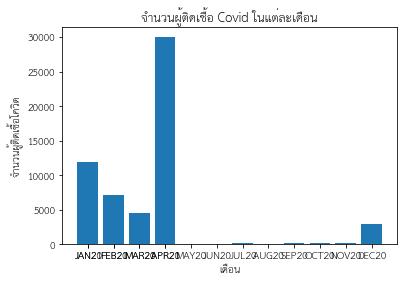

In [45]:
#bar chart ธรรมดา
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4],[data2[(data2['announce_date'].dt.month==1)].shape[0],
                                     data2[(data2['announce_date'].dt.month==2)].shape[0],
                                     data2[(data2['announce_date'].dt.month==3)].shape[0],
                                     data2[(data2['announce_date'].dt.month==4)].shape[0],
                                     data2[(data2['announce_date'].dt.month==5)].shape[0],
                                     data2[(data2['announce_date'].dt.month==6)].shape[0],
                                     data2[(data2['announce_date'].dt.month==7)].shape[0],
                                     data2[(data2['announce_date'].dt.month==8)].shape[0],
                                     data2[(data2['announce_date'].dt.month==9)].shape[0],
                                     data2[(data2['announce_date'].dt.month==10)].shape[0],
                                     data2[(data2['announce_date'].dt.month==11)].shape[0],
                                     data2[(data2['announce_date'].dt.month==12)].shape[0],
                                     data2[(data2['announce_date'].dt.month==1)].shape[0],
                                     data2[(data2['announce_date'].dt.month==2)].shape[0],
                                    data2[(data2['announce_date'].dt.month==3)].shape[0],
                                    data2[(data2['announce_date'].dt.month==4)].shape[0]
                         ],tick_label=['JAN20','FEB20','MAR20','APR20','MAY20','JUN20','JUL20','AUG20','SEP20','OCT20','NOV20','DEC20','JAN21','FEB21','MAR21','APR21']) #ชื่อของแท่งแต่ละแท่ง
plt.xlabel('เดือน')
plt.ylabel('จำนวนผู้ติดเชื้อโควิด')
plt.title('จำนวนผู้ติดเชื้อ Covid ในแต่ละเดือน');

Stacked bar chart

In [48]:
labels = ['JAN20','FEB20','MAR20','APR20','MAY20','JUN20','JUL20','AUG20','SEP20','OCT20','NOV20','DEC20','JAN21','FEB21','MAR21','APR21']

NameError: ignored

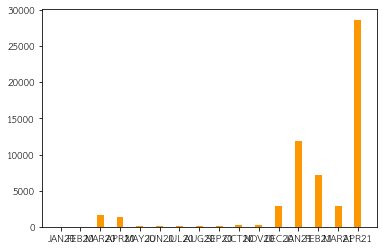

In [49]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, covid, width,  label='before tunch', color = '#fc9700')
ax.bar(labels, d, width, bottom=b4lunch, label='before midnight', color = '#19038a')

ax.set_ylabel('Number')
ax.set_title('เปรียบเทียบจำนวนผู้ป่วยกับจำนวนคนเดินทางในแต่ละเดือน')
ax.legend()

plt.show()

NameError: ignored

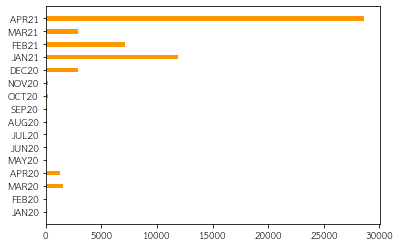

In [51]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels, covid, width,  label='before tunch', color = '#fc9700')
ax.barh(labels, d, width, left=b4lunch, label='before midnight', color = '#19038a')

ax.set_ylabel('Number')
ax.set_title('เปรียบเทียบจำนวนผู้ป่วยกับจำนวนคนเดินทางในแต่ละเดือน')
ax.legend()

plt.show()

##2. เปรียบเทียบวิธีการเดินทางของคนเป็นรายเดือนเทียบกับจำนวนผู้ป่วยในเดือนนั้นๆ


- จำแนกดูวิธีการเดินทางของไฟล์ 'passenger-covid19.xlsx' แล้วนำมาเปรียบเทียบกับข้อมูลจำนวนผู้ป่วยในเดือนนั้นๆ ที่ได้เตรียมข้อมูลไว้แล้วจากข้อที่ 1 

In [24]:
data1 = pd.read_excel(os.path.join(path,'passenger-covid19.xlsx'),sheet_name='2563-2564 รวมในประเทศ',skiprows=1,skipfooter=33)
data1.head()

,Unnamed: 0,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-11 00:00:00,2020-01-12 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,2020-01-15 00:00:00,2020-01-16 00:00:00,2020-01-17 00:00:00,2020-01-18 00:00:00,2020-01-19 00:00:00,2020-01-20 00:00:00,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,...,2021-03-18 00:00:00,2021-03-19 00:00:00,2021-03-20 00:00:00,2021-03-21 00:00:00,2021-03-22 00:00:00,2021-03-23 00:00:00,2021-03-24 00:00:00,2021-03-25 00:00:00,2021-03-26 00:00:00,2021-03-27 00:00:00,2021-03-28 00:00:00,2021-03-29 00:00:00,2021-03-30 00:00:00,2021-03-31 00:00:00,2021-04-01 00:00:00,2021-04-02 00:00:00,2021-04-03 00:00:00,2021-04-04 00:00:00,2021-04-05 00:00:00,2021-04-06 00:00:00,2021-04-07 00:00:00,2021-04-08 00:00:00,2021-04-09 00:00:00,2021-04-10 00:00:00,2021-04-11 00:00:00,2021-04-12 00:00:00,2021-04-13 00:00:00,2021-04-14 00:00:00,2021-04-15 00:00:00,2021-04-16 00:00:00,2021-04-17 00:00:00,2021-04-18 00:00:00,2021-04-19 00:00:00,2021-04-20 00:00:00,2021-04-21 00:00:00,2021-04-22 00:00:00,2021-04-23 00:00:00,2021-04-24 00:00:00,2021-04-25 00:00:00,2021-04-26 00:00:00
0,ทางถนน (คน),1483255,1705026,1752572,1576146,1565134,1746239,1730243,1721777,1698594,1727356,1522765,1511236,1683606,1691301,1727613,1676901,1732040,1556750,1511356,1718946,1710079,1678182,1685422,1658692,1523835,1498975,1696898,1679988,1668462,1640721,1704546,1400174,1483074,1706497,1731697,1727513,1662866,1746742,1505635,...,997062,1017447,849673,787616,937505,969454,958065,981683,1011976,877911,794001,974571,965117,967022,987469,1006485,868194,789312,965421,753176,908431,936938,929038,719618,555680,578184,424539,454352,479063,596596,540688,507339,695769,665925,648848,631892,635830,516751,425707,580580
1,ทางราง (คน),885353,1269207,1366412,1027281,915425,1479971,1496915,1496873,1525899,1630428,1192917,988051,1479502,1491002,1502596,1507477,1599647,1169227,983700,1495196,1497279,1488097,1497174,1527329,1116084,938763,1420125,1457240,1440515,1464619,1597290,1097787,940562,1452349,1437693,1463069,1465400,1589959,1036116,...,984873,1033094,690769,544737,961659,986118,994193,1007277,1083825,730040,583999,1002307,1008957,1039196,1037660,1109747,726174,537800,986006,586488,932517,830224,792450,430863,303809,396526,235614,227986,245450,421863,303925,260010,520387,488979,475030,467490,474554,289943,223384,418835
2,ทางน้ำ (คน),272578,291990,301260,271171,254176,281785,275127,253550,263139,280283,243767,246025,276490,276916,253897,252473,281743,251052,227983,293441,278167,267105,266393,281291,257999,246371,269399,270801,253640,257520,264406,220866,231707,264747,259426,262889,257261,268799,234187,...,85762,126155,81959,86020,90290,109277,78491,88408,88934,85300,79325,107145,95217,91676,84888,81193,115793,106230,100081,83620,116425,105530,118869,163296,169357,167760,182536,166326,150923,108396,103610,73357,77813,69035,66006,60186,54870,48885,42733,53591
3,ทางอากาศ* (คน),102678,104613,100575,100852,100784,98456,98722,96142,98749,101348,93156,99755,99229,98052,98970,103727,106000,103356,105954,105424,100735,101432,104623,103697,101563,103158,103498,98451,95555,95849,97556,90402,89533,88154,85779,88266,93860,99445,94944,...,51244,65243,57665,64944,59144,51341,53670,59380,67960,63406,72844,66721,56866,57980,70353,77529,76062,80447,73958,77376,74769,79717,75900,69100,59960,51998,47717,48945,49859,44204,43157,45917,29483,25390,18141,16139,15365,13702,16622,13585
4,รวมประชาชนเดินทาง (คน),2743864,3370836,3520819,2975450,2835519,3606451,3601007,3568342,3586381,3739415,3052605,28450

##3. เปรียบเทียบ จำนวนผู้ป่วยที่ตรวจพบเชื้อ covid-19 ของจังหวัด top 10 ของ 6 เดือนล่าสุด


- เรียกตารางข้อมูลจำนวนผู้ป่วยจากที่ทำไว้ในข้อที่ 1 โดยเปรียบเทียบ 10 อันดับใน 6 เดือนล่าสุดโดยการใช้ .iloc ในการดูลำดับจำนวนผู้ป่วยที่ตรวจพบเชื้อโควิด 10 อันดับแรก แล้วจึงนำข้อมูลมาทำกราฟเส้น เพื่อความสวยงามและดูง่ายมากขึ้น 

##4. เปรียบเทียบจำนวนผู้ป่วยที่ตรวจพบเชื้อ covid-19 ของแต่ละภูมิภาค (5 ภูมิภาค (การท่องเที่ยว)) ตามข้อมูลใน https://th.wikipedia.org/wiki/ภูมิภาคของประเทศไทย

- อันดับแรกแยกเป็นแต่ละภูมิภาค จากไฟล์ covid19cases.csv ที่ทำการสร้างคอลัมน์จำนวนผู้ป่วยที่ติดเชื้อโควิดแล้ว โดยการสร้าง DataFrame ขึ้นมา เป็นหมวดๆของแต่ละภาคตามเว็บ https://th.wikipedia.org/wiki/ภูมิภาคของประเทศไทย ในคอลัมน์ใหม่ ชื่อภูมิภาค หรือเพื่อไม่ต้องเขียนโค้ดเยอะ ก็สามารถที่จะวนลูปแยกเป็นหมวดๆได้
- หลังจากได้คอลัมน์ใหม่ที่แยกเป็นหมวดหมู่แล้ว ก็นำมาเปรียบเทียบจำนวนผู้ป่วยที่ตรวจพบเชื้อ covid-19 ของแต่ละภูมิภาคได้เลย